# 0 Libraries

In the first section, We import all the libraries and functions that I will be using.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# PCA
from sklearn.decomposition import PCA
# T-SNE
from sklearn.manifold import TSNE

# Importing Evaluation matrics
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# Importing tools for clustering
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# seed
RSEED = 10

# 1 Data Exploration and Pre-processing

In this section, We will be exploring and visualizing the data and its variables to get a better understanding of what is required in the pre-processing section.

There are 5 types of datasets:
County, Economic, General Demographic, Life Expectancy & US Election Results 1976-2020.

### File Descriptions
#### County
5296US_landarea.csv<br>
5296US_waterarea.csv<br>
5296US_pop.csv<br>
#### Economic:
BCD-DJIA1.csv<br>
county1.csv<br>
Dow Jones Industrial Average Historical Data 2.csv<br>
Gdpcounty1218.xlsx<br>
#### General Demographic:
county_complete.csv<br>
#### Life Expectancy:
IHME_USA_LIFE_EXPECTANCY_1987_2007_Y2011M06D16.csv<br>
#### US Election Results:
1976-2020-house.csv<br>
1976-2020-president.csv<br>
1976-2020-senate.csv<br>

### Variables 
__County__<br>
• FIPS – the code for a county within a state. Note that the first two digits may indicate the state.<br>
• State – the name of a state. 48 States are included (Alaska and Hawaii are not included because they are not within the contiguous US). The District of Columbia which is not a state but rather the region in which the capital of the US is, is included.<br>
• County – the name of a county within a state. Two different states can have a county with the same name.<br>
• Land Area – the county land area, in square kilometers.<br>
• Water Area – the area in square kilometers that is covered by water all year long.<br>
• Date – fixed year 1990.<br>
• Population – population estimates for the county in 1990.<br>

__Economic__<br>
• Date – date.<br>
• Value – closing price of the Dow Jones Industrial average (a stock market indicator).<br>
• Historic 1969,1979,1989,1999 Median Household Income by county, state, and overall US<br>
• A sample of what a current downloadable stock market data might look like. Downloading such data and applying is permitted for the bonus question.<br>
• Current Dollar GDP: Gross Domestic Products for county.<br>
• Real Dollar GDP: Gross Domestic Products for county or adjusted of inflation.<br>
• Real Dollar GDP: growth for a given year.<br>
• Line Code 2 (Private goods-producing industries) + Line Code 3 (Private services-providing industries) + Line Code 4 (Government and government enterprises) = Line Code 1 (All Industries).<br>
• The figures are raw and are not adjusted per capita or by other means<br>

__General Demographic__<br>
• fips – the code for a county within a state.<br>
• state – the name of a state.<br>
• name – the name of a county within a state.<br>
• pop20## – estimated population in the year 20##.<br>
• age_under_#_(year) – percentage of population under the age of # in a specific year.<br>
• Over 100 additional variables of demographic data.<br>

__Life Expectancy__<br>
• fips: Federal Information Processing Standard (FIPS) code for uniquely indentifying US counties <br>
• State: US states<br>
• County: US county name<br>
• Male life expectancy (years)<br>
• Years behind international frontier (male): how many calendar years behind the county was compared to the top ten countries for life expectancy in the year listed<br>
• Female life expectancy (years)<br>
• Years behind international frontier (female): how many calendar years behind the county was compared to the top ten countries  for life expectancy in the year listed<br>
• White male life expectancy (years)<br>
• White female life expectancy (years)<br>
• Black male life expectancy (years): cell blank if data not available<br>
• Black female life expectancy (years): cell blank if data not available<br>
• Closest ranked countries for male life expectancy (higher): Based on UN life expectancy estimates, closest countries with life expectancies higher than county/year listed<br> 
• Closest ranked countries for female life expectancy (higher): Based on UN life expectancy estimates, closest countries with life expectancies higher than county/year listed <br>
• Closest ranked countries for male life expectancy (lower): Based on UN life expectancy estimates, closest countries with life expectancies lower than county/year listed <br>
• Closest ranked countries for female life expectancy (lower): Based on UN life expectancy estimates, closest countries with life expectancies lower than county/year listed<br>
• Rank (male): county rank for year listed<br>
• Rank (female): county rank for year listed<br>
• Male life expectancy change 1987 to 2007 (years)<br>
• Female life expectancy change 1987 to 2007 (years)<br>
• Male life expectancy change 1987 to 1997 (years)<br>
• Female life expectancy change 1987 to 1997 (years)<br>

__US Election Results__<br>
• year – election year.<br>
• state – the name of a state.<br>
• state_po – postal abbreviation of the state.<br>
• state_fips – the prefix of the fips code describing the state.<br>
• office – US House (house of representative race).<br>
• district – the district within a state (Alabama has 7 districts in 1976 election, which means they sent 7 house members to the house of representatives).<br>
If a district is labeled 0, it means that the state had a small population and sent only a single representative to the house of representatives (Alaska, is an example in 1976)
• stage – general election or primary.<br>
• runoff – was it a runoff (some elections have the top 2 candidates compete against one another).
• special – was the election unscheduled.<br>
• candidate – name of candidate.<br>
• party – Democrat / Republican / Other smaller parties • writein – was the candidate on the ballot or written in.<br>
• candidate votes – the number of votes that the candidate received.<br>
• total votes – total votes in the district.<br>
• version – latest update in data<br>

In [2]:
#Import dataset
land_area=pd.read_csv('5296US_landarea.csv')
pop=pd.read_csv('5296US_pop.csv')
water_area=pd.read_csv('5296US_waterarea.csv')
economic=pd.read_csv('BCB-UDJIAD1.csv')
household_income=pd.read_csv('county1.csv')
dow_jones_industrial_average=pd.read_csv('Dow Jones Industrial Average Historical Data 2.csv')
gdp=pd.read_excel('gdpcounty1218.xlsx')
county_complete=pd.read_csv('county_complete.csv')
life_expectancy=pd.read_excel('IHME_USA_LIFE_EXPECTANCY_1987_2007_Y2011M06D16.xlsx')
house=pd.read_csv('1976-2020-house.csv')
president=pd.read_csv('1976-2020-president.csv')
senate=pd.read_csv('1976-2020-senate.csv')

In [3]:
# look at 5 random observations 
print ("land area dataset:")
display(land_area.sample(5, random_state=RSEED))
print ("population dataset:")
display(pop.sample(5, random_state=RSEED))
print ("water area dataset:")
display(water_area.sample(5, random_state=RSEED))
print ("economic dataset:")
display(economic.sample(5, random_state=RSEED))
print ("household income dataset:")
display(household_income.sample(5, random_state=RSEED))
print ("dow jones industrial average Historical dataset:")
display(dow_jones_industrial_average.sample(5, random_state=RSEED))
print ("General Demographic dataset:")
display(county_complete.sample(5, random_state=RSEED))
print ("Life Expectancy dataset:")
display(life_expectancy.sample(5, random_state=RSEED))
print ("US ELection Results dataset:")
display(house.sample(5, random_state=RSEED))
display(president.sample(5, random_state=RSEED))
display(senate.sample(5, random_state=RSEED))

land area dataset:


,FIPS,State,County,Land Area
2081,39145,Ohio,Scioto,1585.9
485,13261,Georgia,Sumter,1257.0
1758,34037,New Jersey,Sussex,1350.0
1309,27061,Minnesota,Itasca,6903.1
1249,26107,Michigan,Mecosta,1439.5


population dataset:


,FIPS,State,County,Date,Population
2081,39145,Ohio,Scioto,1990,80327
485,13261,Georgia,Sumter,1990,30228
1758,34037,New Jersey,Sussex,1990,130943
1309,27061,Minnesota,Itasca,1990,40863
1249,26107,Michigan,Mecosta,1990,37308


water area dataset:


,FIPS,State,County,Water Area
2081,39145,Ohio,Scioto,9.8
485,13261,Georgia,Sumter,18.8
1758,34037,New Jersey,Sussex,38.1
1309,27061,Minnesota,Itasca,680.2
1249,26107,Michigan,Mecosta,39.8


economic dataset:


,Date,Value
15290,1955-09-09,474.59
24988,1922-05-13,92.93
29973,1905-05-04,74.68
21956,1932-07-07,41.81
19221,1941-08-26,126.56


household income dataset:


,"Table C1. Median Household Income by County: 1969, 1979, 1989, and 1999",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
42,"Houston County, AL","34,431","24,813","14,075","6,424",NaN
3179,"Eau Claire County, WI","39,219","25,886","15,300","8,592",NaN
1149,"Woodford County, KY","49,491","32,858","17,333","7,532",NaN
2409,"Anderson County, SC","36,807","25,748","15,435","7,206",NaN
2976,"Louisa County, VA","39,402","26,169","13,871","5,486",NaN


dow jones industrial average Historical dataset:


,Date,Price,Open,High,Low,Vol.,Change %
528,"Nov 22, 2017","23,526.18","23,597.24","23,605.77","23,507.61",268.76M,-0.27%
2259,"Jan 06, 2011","11,697.31","11,716.93","11,795.78","11,615.31",193.08M,-0.22%
1817,"Oct 09, 2012","13,473.53","13,582.88","13,592.33","13,473.31",103.63M,-0.81%
176,"Apr 22, 2019","26,511.05","26,510.77","26,553.05","26,458.61",232.57M,-0.18%
1145,"Jun 15, 2015","17,791.17","17,890.76","17,890.76","17,698.42",91.92M,-0.60%


General Demographic dataset:


,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
2830,51021,Virginia,Bland County,6871.0,6824,6776.0,6695.0,6675.0,6587.0,6535.0,...,NaN,1.0,5.4,7.5,0.0,8.1,10.9,6.8,95.0,93.9
2087,39089,Ohio,Licking County,145491.0,166492,167149.0,167568.0,168401.0,169295.0,170425.0,...,15.1,2.9,3.9,6.4,0.1,4.9,3.5,9.5,91.4,90.1
25,1051,Alabama,Elmore County,65874.0,79303,80006.0,80220.0,80555.0,80562.0,80912.0,...,15.2,1.7,4.0,7.4,0.0,3.1,2.3,10.6,75.3,73.2
1122,22019,Louisiana,Calcasieu Parish,183577.0,192768,193813.0,194506.0,195506.0,196641.0,198542.0,...,25.3,2.4,4.9,9.2,0.1,2.3,1.8,7.9,70.0,67.4
108,4023,Arizona,Santa Cruz County,38381.0,47420,47615.0,47292.0,46845.0,46468.0,46191.0,...,31.5,1.3,7.2,10.2,2.7,4.3,3.8,5.1,85.7,14.9


Life Expectancy dataset:


,fips,State,County,Year,Male life expectancy (years),Years behind international frontier (male),Female life expectancy (years),Years behind international frontier (female),White male life expectancy (years),White female life expectancy (years),...,Closest ranked countries for male life expectancy (lower),Closest ranked countries for female life expectancy (lower),Rank (male),Rank (female),Male life expectancy change 1987 to 2007 (years),Female life expectancy change 1987 to 2007 (years),Male life expectancy change 1987 to 1997 (years),Female life expectancy change 1987 to 1997 (years),Male life expectancy change 1997 to 2007 (years),Female life expectancy change 1997 to 2007 (years)
23511,22011,LOUISIANA,BEAUREGARD,1999,71.8,23,78.1,22,72.6,78.7,...,"French Guiana,Grenada,Guam,Mexico,Oman","Albania,Argentina,French Guiana,Poland,Slovakia",2397,2581,2.3,0.1,1.8,0.5,0.5,-0.4
52778,47167,TENNESSEE,TIPTON,1992,70.0,26,77.3,18,71.4,78.5,...,"French Guiana,Macedonia, the Former Yugoslav R...","Brunei Darussalam,Chile,Croatia,Cuba,Uruguay",2585,2803,2.6,1.1,1.2,0.8,1.4,0.3
18938,20025,KANSAS,CLARK,2004,74.3,16,79.5,21,74.3,79.5,...,"Bahrain,Belize,Oman,Puerto Rico,Qatar","Albania,Barbados,French Guiana,Kuwait,Uruguay",1557,1651,3.4,0.3,1.5,0.3,1.9,0.0
28558,27089,MINNESOTA,MARSHALL,2006,75.2,14,82.0,9,75.2,82.0,...,"Bahrain,Brunei Darussalam,Portugal,Puerto Rico...","Cyprus,Guadeloupe,Luxembourg,New Zealand,Virgi...",1079,162,3.1,2.8,1.7,0.6,1.4,2.2
65412,55123,WISCONSIN,VERNON,2005,75.4,12,80.0,19,75.4,80.0,...,"Brunei Darussalam,Chile,Korea, Republic of,Por...","Albania,French Guiana,Kuwait,Mayotte,Uruguay",909,1338,2.9,0.8,1.4,0.6,1.5,0.2


US ELection Results dataset:


,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
29058,2018,NEW YORK,NY,36,21,13,US HOUSE,8,GEN,NaN,False,ERNEST C JOHNSON,CONSERVATIVE,False,TOTAL,9997,191567,False,20220331,False
30797,2020,SOUTH CAROLINA,SC,45,57,48,US HOUSE,2,GEN,False,False,ADAIR FORD BOROUGHS,DEMOCRAT,False,TOTAL,155118,364215,False,20220331,False
22920,2010,GEORGIA,GA,13,58,44,US HOUSE,3,GEN,NaN,False,WRITEIN,NaN,True,TOTAL,3,242239,False,20220331,False
20574,2006,NEW YORK,NY,36,21,13,US HOUSE,1,GEN,False,False,TIMOTHY H BISHOP,DEMOCRAT,False,TOTAL,92546,179113,False,20220331,True
23974,2010,VIRGINIA,VA,51,54,40,US HOUSE,7,GEN,NaN,False,WRITEIN,NaN,True,TOTAL,413,233402,False,20220331,False


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
1441,1992,LOUISIANA,LA,22,72,45,US PRESIDENT,"HAGELIN, JOHN",NATURAL LAW,False,889,1790017,20210113,NaN,OTHER
1489,1992,MISSISSIPPI,MS,28,64,46,US PRESIDENT,OTHER,INDEPENDENT,False,4310,981793,20210113,NaN,OTHER
2447,2004,COLORADO,CO,8,84,62,US PRESIDENT,"VAN AUKEN, BILL",SOCIALIST EQUALITY PARTY,False,329,2129630,20210113,NaN,OTHER
454,1980,KENTUCKY,KY,21,61,51,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,617417,1295627,20210113,NaN,DEMOCRAT
3021,2008,TEXAS,TX,48,74,49,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,3528633,8077795,20210113,NaN,DEMOCRAT


,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
101,1976,PENNSYLVANIA,PA,42,23,14,US SENATE,statewide,gen,False,WILLIAM J. GREEN,DEMOCRAT,False,total,2126977,4546353,False,20210114,DEMOCRAT
1178,1994,CONNECTICUT,CT,9,16,1,US SENATE,statewide,gen,False,JOSEPH I. LIEBERMAN,A CONNECTICUT PARTY,False,total,280049,1079664,False,20210114,OTHER
2661,2010,WEST VIRGINIA,WV,54,55,56,US SENATE,statewide,gen,True,JEFF BECKER,CONSTITUTION,False,total,6425,529948,False,20210114,OTHER
3170,2016,MARYLAND,MD,24,52,52,US SENATE,statewide,gen,False,NaN,NaN,True,total,7,2726170,False,20210114,OTHER
437,1982,MASSACHUSETTS,MA,25,14,3,US SENATE,statewide,gen,False,NaN,NaN,True,total,205,2050769,False,20210114,OTHER


In [4]:
# data shape (rows, columns)
print ("DATA SHAPE")
print ("land area dataset:", land_area.shape)
print ("population dataset:", pop.shape)
print ("water area dataset:",water_area.shape)
print ("economic dataset:", economic.shape)
print ("household income dataset:", household_income.shape)
print ("dow jones industrial average Historical dataset:", dow_jones_industrial_average.shape)
print ("General Demographic dataset:", county_complete.shape)
print ("Life Expectancy dataset:", life_expectancy.shape)
print ("US ELection Results dataset:", house.shape, president.shape, senate.shape)

DATA SHAPE
land area dataset: (3111, 4)
population dataset: (3111, 5)
water area dataset: (3111, 4)
economic dataset: (32601, 2)
household income dataset: (3272, 6)
dow jones industrial average Historical dataset: (2766, 7)
General Demographic dataset: (3142, 188)
Life Expectancy dataset: (66087, 24)
US ELection Results dataset: (31103, 20) (4287, 15) (3629, 19)


In [5]:
# display descriptive statistics for numeric variables
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print ("land area dataset:")
land_area.describe()

land area dataset:


,FIPS,Land Area
count,3111.00,3111.00
mean,30699.12,2463.91
std,14985.16,3373.88
min,1001.00,4.70
25%,19048.00,1115.30
50%,29217.00,1582.50
75%,46012.00,2371.80
max,56045.00,51960.00


In [6]:
print ("population dataset:")
pop.describe()

population dataset:


,FIPS,Date,Population
count,3111.00,3111.00,3111.00
mean,30699.12,1990.00,79412.28
std,14985.16,0.00,264648.27
min,1001.00,1990.00,52.00
25%,19048.00,1990.00,10431.50
50%,29217.00,1990.00,22254.00
75%,46012.00,1990.00,54870.00
max,56045.00,1990.00,8863164.00


In [7]:
print ("water area dataset:")
water_area.describe()

water area dataset:


,FIPS,Water Area
count,3111.00,2758.00
mean,30699.12,101.80
std,14985.16,425.05
min,1001.00,0.00
25%,19048.00,4.03
50%,29217.00,13.70
75%,46012.00,43.20
max,56045.00,10687.40


In [8]:
print ("economic dataset:")
economic.describe()

economic dataset:


,Value
count,32601.00
mean,2251.15
std,4109.25
min,28.48
25%,97.07
50%,273.53
75%,1202.08
max,18312.39


In [9]:
print ("household income dataset:")
household_income.describe()

household income dataset:


,"Table C1. Median Household Income by County: 1969, 1979, 1989, and 1999",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
count,3209,3231,3193,3193,3186,1
unique,3207,3002,2937,2777,2497,1
top,INDEPENDENT CITY:,,"20,367","14,612",(NA),
freq,3,37,4,4,7,1


In [10]:
print ("dow jones industrial average Historical dataset:")
dow_jones_industrial_average.describe()

dow jones industrial average Historical dataset:


,Date,Price,Open,High,Low,Vol.,Change %
count,2766,2766,2766,2766,2766,2766,2766
unique,2766,2754,2754,2759,2756,2309,482
top,"Dec 31, 2019","16,906.62","11,370.44","8,278.12","16,983.88",-,0.11%
freq,1,2,2,2,2,342,27


In [11]:
print ("General Demographic dataset:")
county_complete.describe()

General Demographic dataset:


,fips,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
count,3142.00,3139.00,3142.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,...,1266.00,3142.00,3142.00,3142.00,3142.00,3142.00,3142.00,3142.00,3142.00,3142.00
mean,30383.65,89649.99,98262.04,99279.65,100027.94,100741.92,101502.68,102272.74,103026.49,103763.41,...,21.10,2.45,4.94,9.64,0.50,6.13,5.44,8.67,82.92,76.25
std,15162.51,292547.67,312946.70,316688.64,319944.37,322954.93,325944.40,328885.23,331294.62,333194.52,...,8.95,1.98,2.64,5.11,0.92,5.01,5.73,2.61,16.90,20.22
min,1001.00,67.00,82.00,90.00,86.00,89.00,89.00,88.00,88.00,88.00,...,2.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.60,0.70
25%,18177.50,11223.50,11114.50,11140.00,11035.00,11048.00,10994.50,10969.00,10970.00,10975.50,...,14.62,1.40,3.30,5.80,0.00,2.90,1.90,7.10,76.40,64.43
50%,29176.00,24621.00,25872.00,25839.00,25797.00,25725.00,25680.00,25647.00,25774.00,25857.00,...,20.10,2.00,4.60,8.70,0.20,4.80,3.90,8.50,89.60,83.75
75%,45080.50,61775.00,66780.00,67128.50,67177.00,67589.50,67733.50,67597.50,67505.00,67756.00,...,26.20,3.00,6.10,12.10,0.60,7.80,7.07,9.90,94.90,92.50
max,56045.00,9519338.00,9818605.00,9885998.00,9956152.00,10018604.00,10072695.00,10123248.00,10150558.00,10163507.00,...,55.90,28.90,26.50,46.30,23.90,55.80,64.00,26.20,100.00,100.00


In [12]:
print ("Life Expectancy dataset:")
life_expectancy.describe()

Life Expectancy dataset:


,fips,Year,Male life expectancy (years),Female life expectancy (years),White male life expectancy (years),White female life expectancy (years),Black male life expectancy (years),Black female life expectancy (years),Rank (male),Rank (female),Male life expectancy change 1987 to 2007 (years),Female life expectancy change 1987 to 2007 (years),Male life expectancy change 1987 to 1997 (years),Female life expectancy change 1987 to 1997 (years),Male life expectancy change 1997 to 2007 (years),Female life expectancy change 1997 to 2007 (years)
count,66087.00,66087.00,66087.00,66087.00,66087.00,66087.00,15494.00,18362.00,66087.00,66087.00,66087.00,66087.00,66087.00,66087.00,66087.00,66087.00
mean,30394.85,1997.00,72.66,79.14,73.14,79.51,66.36,74.30,1574.55,1574.72,3.10,1.20,1.60,0.71,1.50,0.49
std,15170.66,6.06,2.28,1.43,1.82,1.01,2.47,1.39,908.79,908.76,1.14,1.04,0.66,0.54,0.78,0.75
min,1001.00,1987.00,61.70,73.20,64.40,75.40,56.10,69.40,1.00,1.00,-1.10,-1.90,-1.90,-1.50,-1.80,-2.50
25%,18177.00,1992.00,71.20,78.30,71.90,78.80,64.60,73.40,788.00,788.00,2.40,0.50,1.20,0.30,1.00,0.00
50%,29179.00,1997.00,72.90,79.30,73.10,79.50,66.10,74.10,1574.00,1575.00,3.10,1.20,1.60,0.70,1.50,0.50
75%,45085.00,2002.00,74.20,80.10,74.30,80.20,67.80,75.00,2362.00,2362.00,3.80,1.80,2.00,1.10,2.00,1.00
max,56045.00,2007.00,81.10,86.00,80.90,86.20,77.20,81.80,3148.00,3148.00,12.90,7.10,6.20,3.70,6.70,4.60


In [13]:
print ("US ELection Results dataset:")
house.describe()

US ELection Results dataset:


,year,state_fips,state_cen,state_ic,district,candidatevotes,totalvotes,version
count,31103.00,31103.00,31103.00,31103.00,31103.00,31103.00,31103.00,31103.00
mean,1998.77,28.76,50.89,37.05,9.88,66172.46,213197.03,20220331.00
std,13.09,15.21,26.31,21.80,9.98,64177.33,76684.97,0.00
min,1976.00,1.00,11.00,1.00,0.00,-1.00,-1.00,20220331.00
25%,1988.00,17.00,23.00,14.00,3.00,4316.50,160713.00,20220331.00
50%,2000.00,31.00,51.00,37.00,6.00,56455.00,205055.00,20220331.00
75%,2010.00,40.00,74.00,52.00,13.00,110829.00,260660.00,20220331.00
max,2020.00,56.00,95.00,82.00,53.00,387109.00,601509.00,20220331.00


In [14]:
president.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,4287.00,4287.00,4287.00,4287.00,4287.00,4287.00,4287.00,0.00
mean,1999.08,28.62,53.67,39.75,311907.59,2366924.15,20210113.00,NaN
std,14.22,15.62,26.03,22.77,764801.10,2465008.31,0.00,NaN
min,1976.00,1.00,11.00,1.00,0.00,123574.00,20210113.00,NaN
25%,1988.00,16.00,33.00,22.00,1177.00,652274.00,20210113.00,NaN
50%,2000.00,28.00,53.00,42.00,7499.00,1569180.00,20210113.00,NaN
75%,2012.00,41.00,81.00,61.00,199241.50,3033118.00,20210113.00,NaN
max,2020.00,56.00,95.00,82.00,11110250.00,17500881.00,20210113.00,NaN


In [15]:
senate.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version
count,3629.00,3629.00,3629.00,3629.00,3629.00,3629.00,3629.00
mean,2000.07,28.77,53.25,39.21,409122.35,2218922.22,20210114.00
std,13.25,15.45,25.87,22.57,778913.68,2116731.91,0.00
min,1976.00,1.00,11.00,1.00,1.00,1.00,20210114.00
25%,1990.00,17.00,33.00,21.00,4774.00,692350.00,20210114.00
50%,2002.00,29.00,54.00,42.00,54701.00,1567181.00,20210114.00
75%,2012.00,41.00,74.00,56.00,476604.00,2948741.00,20210114.00
max,2021.00,56.00,95.00,82.00,7864624.00,12578511.00,20210114.00


In [16]:
# find the largest states 
print("The states sorting by population:")
state_pop = pop.groupby('State')['Population'].sum().to_frame(name='Total Population')
state_pop.sort_values(by= ['Total Population'], ascending=False)

The states sorting by population:


,Total Population
State,
California,29760021
New York,17990455
Texas,16986510
Florida,12937926
Pennsylvania,11881643
Illinois,11430602
Ohio,10847115
Michigan,9295297
New Jersey,7730188


<AxesSubplot:title={'center':'States by Population'}, ylabel='Total Population'>

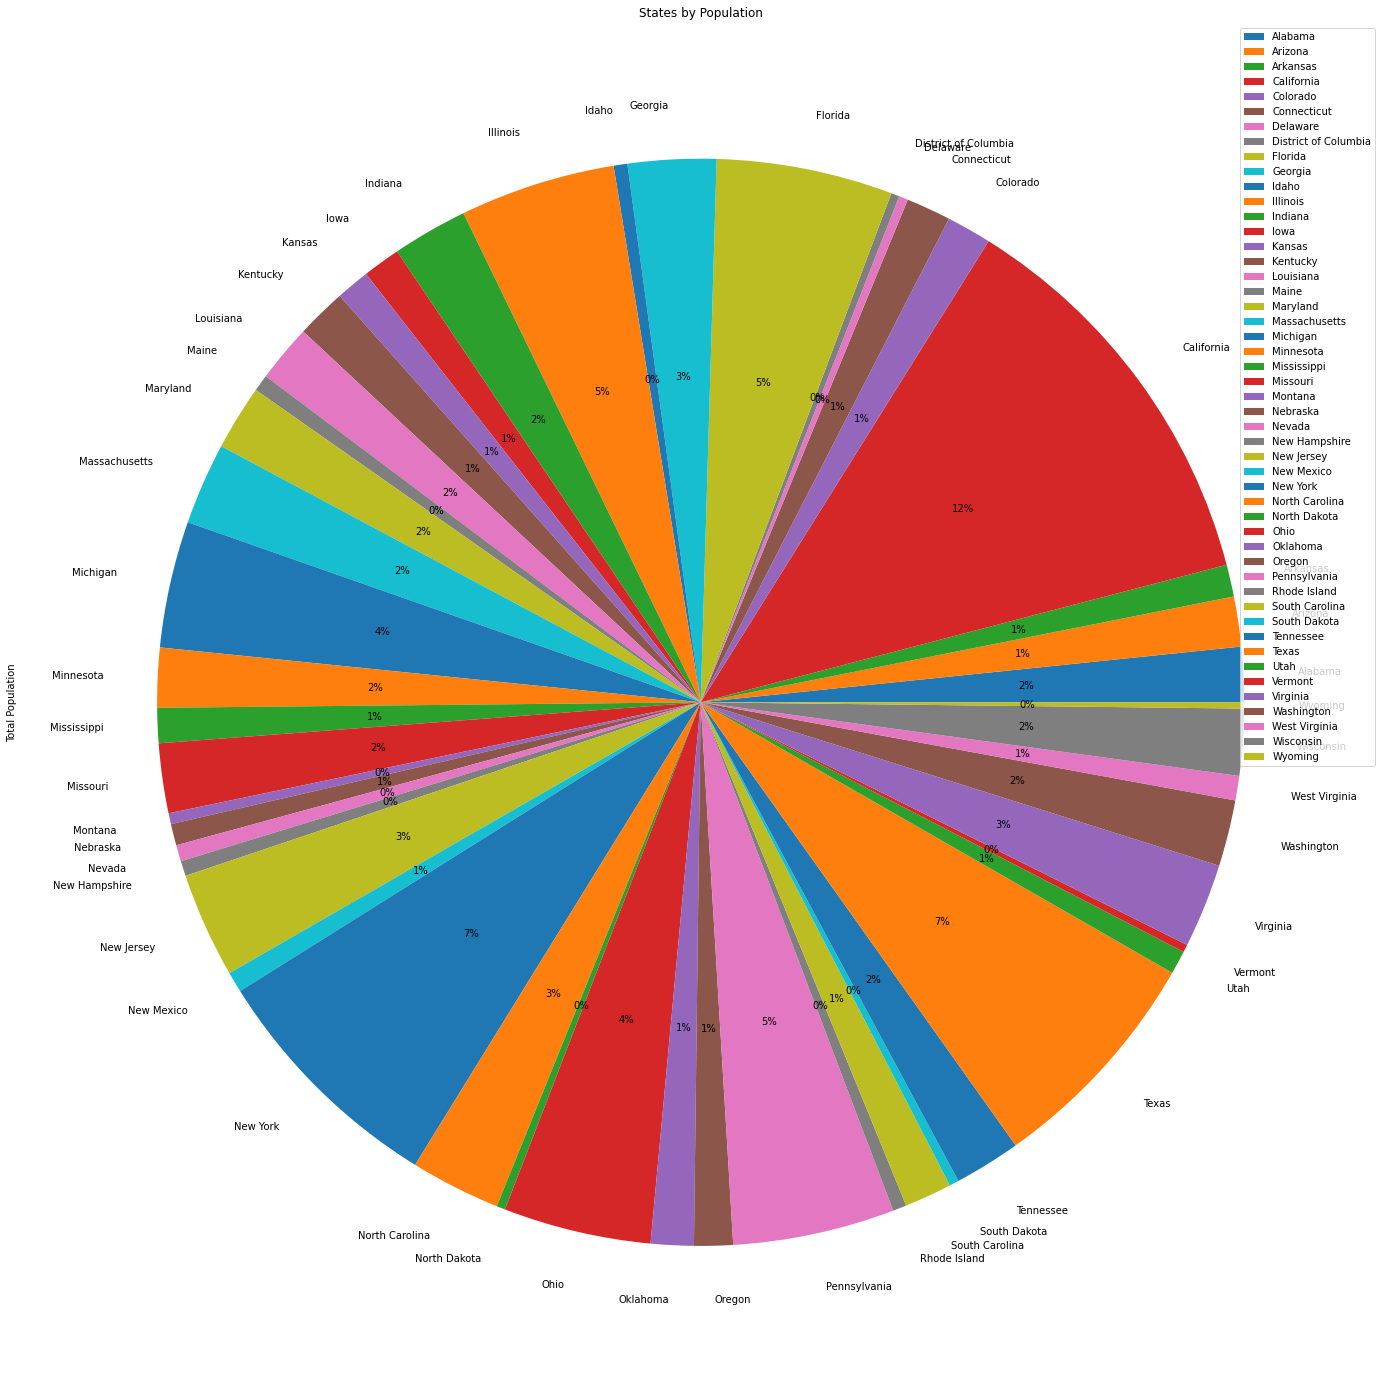

In [17]:
state_pop.plot(kind='pie', y='Total Population', autopct='%1.0f%%', title='States by Population', figsize=(25, 25))

# 2 Dimensionality Reduction

In this section, We apply clustering algorithm on the data with at least 2 dimensionality reduction algorithms.
The relevant states are: California, Florida, South Dakota, and Wyoming. <br>
Relevant data:
1. 5296US_landarea.csv 
2. county_complete.csv 
3. IHME_USA_LIFE_EXPECTANCY_1987_2007_Y2011M06D16.XLSX

## Pre-Processing

In [18]:
# merge land_area & county_complete to LIFE_EXPECTANCY dataset
land_area.rename(columns = {'FIPS':'fips'}, inplace = True)
life_expectancy.drop(life_expectancy.columns[8:],axis=1, inplace = True)
life_expectancy.drop(['Years behind international frontier (male)','Years behind international frontier (female)'], axis=1, inplace = True)
land_area.drop(['State','County'], axis=1, inplace = True)
df=pd.merge(life_expectancy, land_area, on='fips', how='left')
county_complete_filtered = county_complete.loc[:, county_complete.columns.str.contains('fips|2017')]
county_complete_filtered = county_complete_filtered.loc[:, ~county_complete_filtered.columns.str.contains('age_|employ')]
county_complete_filtered.drop(county_complete_filtered.columns[2:12],axis=1, inplace = True)
df=pd.merge(df,county_complete_filtered, on='fips', how='left')
#  drop all the data of states which are not: California, Florida, South Dakota, and Wyoming.
df.drop(df[(df['State'] != 'CALIFORNIA') & (df['State'] != 'FLORIDA') & (df['State'] != 'SOUTH DAKOTA') & (df['State'] != 'WYOMING')].index, inplace=True)

In [19]:
df.isnull().sum()

fips                               0
State                              0
County                             0
Year                               0
Male life expectancy (years)       0
Female life expectancy (years)     0
Land Area                         21
pop2017                           21
hs_grad_2017                      21
some_college_2017                 21
bachelors_2017                    21
veterans_2017                     21
mean_work_travel_2017             21
broadband_2017                    21
computer_2017                     21
households_2017                   21
persons_per_household_2017        21
per_capita_income_2017            21
median_household_income_2017      21
poverty_2017                      21
uninsured_2017                    21
civilian_labor_force_2017         21
dtype: int64

In [20]:
# drop observations that don't have at least 8 features
df.dropna(thresh=8, axis=0, inplace=True)

In [21]:
df.isnull().sum()

fips                               0
State                              0
County                             0
Year                               0
Male life expectancy (years)       0
Female life expectancy (years)     0
Land Area                         21
pop2017                            0
hs_grad_2017                       0
some_college_2017                  0
bachelors_2017                     0
veterans_2017                      0
mean_work_travel_2017              0
broadband_2017                     0
computer_2017                      0
households_2017                    0
persons_per_household_2017         0
per_capita_income_2017             0
median_household_income_2017       0
poverty_2017                       0
uninsured_2017                     0
civilian_labor_force_2017          0
dtype: int64

In [22]:
# drop rows that don't have Land Area
df = df.dropna(axis = 0, how ='any')

In [23]:
df.isnull().sum()

fips                              0
State                             0
County                            0
Year                              0
Male life expectancy (years)      0
Female life expectancy (years)    0
Land Area                         0
pop2017                           0
hs_grad_2017                      0
some_college_2017                 0
bachelors_2017                    0
veterans_2017                     0
mean_work_travel_2017             0
broadband_2017                    0
computer_2017                     0
households_2017                   0
persons_per_household_2017        0
per_capita_income_2017            0
median_household_income_2017      0
poverty_2017                      0
uninsured_2017                    0
civilian_labor_force_2017         0
dtype: int64

##### Create Dataset Y

In [24]:
# we encoded States as follow: CALIFORNIA = 0, FLORIDA = 1, SOUTH DAKOTA = 2, WYOMING = 3
le = LabelEncoder()
y = le.fit_transform(df['State'])

##### Create Dataset X

In [25]:
X = df.drop(df.columns[:4],axis=1)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)  

## PCA

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [27]:
print(pca.explained_variance_ratio_)

[0.34842399 0.20585375]


In [28]:
print(abs( pca.components_ ))

[[0.27132182 0.25008874 0.02596141 0.11937396 0.25975559 0.07895089
  0.32042487 0.01226994 0.01943417 0.34271972 0.3313645  0.12465646
  0.12240507 0.34809968 0.32792958 0.30845789 0.274199   0.12322897]
 [0.04148112 0.06765768 0.09931009 0.45156232 0.25671743 0.20765347
  0.05464071 0.25343213 0.23356423 0.04386575 0.03008956 0.44811478
  0.31052253 0.05221536 0.08634325 0.14322781 0.12634172 0.44991389]]


from the results above it can be seen that the most effective feature is per_capita_income_2017 (14th in the row) with socre of 0.34809968. <br>
from the results above it can be seen that the least effective feature is veterans_2017 (8th in the row) with score of 0.01226994.

## T-SNE

In [29]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4452 samples in 0.000s...
[t-SNE] Computed neighbors for 4452 samples in 0.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4452
[t-SNE] Computed conditional probabilities for sample 2000 / 4452
[t-SNE] Computed conditional probabilities for sample 3000 / 4452
[t-SNE] Computed conditional probabilities for sample 4000 / 4452
[t-SNE] Computed conditional probabilities for sample 4452 / 4452
[t-SNE] Mean sigma: 0.993065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.403412
[t-SNE] KL divergence after 1000 iterations: 0.244357


##### Compare between PCA & T-SNE

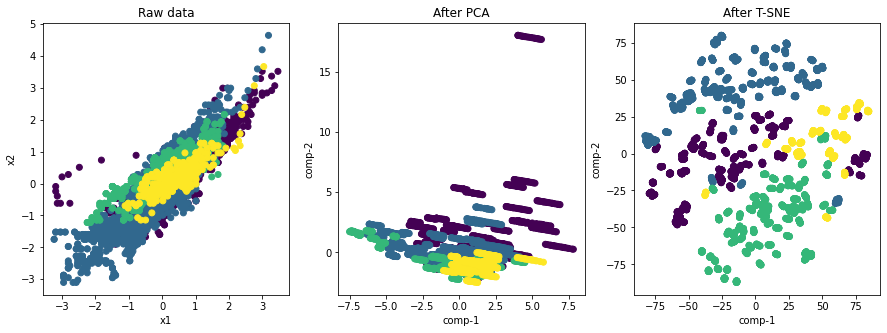

In [30]:
fig, axis = plt.subplots(1,3,figsize=(15,5))

axis[0].scatter(X[:,0], X[:,1], c=y)
axis[0].set_xlabel('x1')
axis[0].set_ylabel('x2')
axis[0].set_title("Raw data")


axis[1].scatter(X_pca[:,0], X_pca[:,1], c=y)
axis[1].set_xlabel('comp-1')
axis[1].set_ylabel('comp-2')
axis[1].set_title("After PCA")

axis[2].scatter(X_tsne[:,0], X_tsne[:,1], c=y)
axis[2].set_xlabel('comp-1')
axis[2].set_ylabel('comp-2')
axis[2].set_title("After T-SNE")

plt.show()

## K-Means

#### After T-SNE 

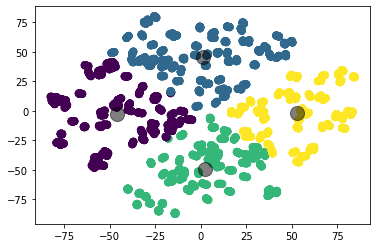

In [31]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_tsne)
y_kmeans = kmeans.predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### After PCA

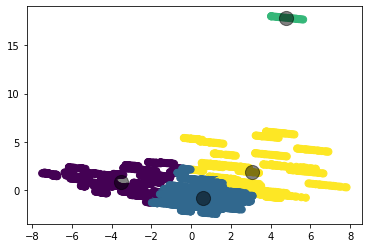

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Findings

It can be seen that the T-SNE was better to divide the data into 4 clusters.<br>
However after k-Means has some false clusters.<br>

[Text(0.5, 1.0, 'after T-SNE')]

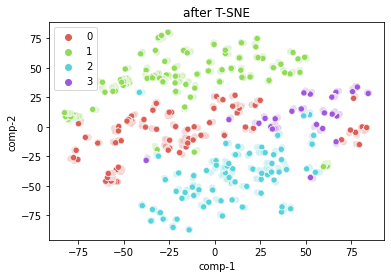

In [33]:
df2 = pd.DataFrame()
df2["y"] = y
df2["comp-1"] = X_tsne[:,0]
df2["comp-2"] = X_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df2).set(title="after T-SNE") 

from the figure above the states which are most similar are california(0) and wyoming(3)

# 3 Regression